### Notebook Used in Part 2 of Basic NFL Data Analysis

This is the notebook I used for Part 2 of our Basic analysis of NFL games.
- NFL Season: 2018-19

Ram Narasimhan

Questions? Twitter: @ramnarasimhan

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Goal: Calculate the Win-Loss score for the whole year for each team

Logic we will use:
1.     Pick each time, one by one.
1.    Filter their home games. Calc the win-loss Home loss = (total home games - home win)
1.   Filter their Away games. Do the same.

### All the Preprocessing Steps that we did in Part 1 one cell

In [6]:
base = "https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_"
year = 2018
coda = ".csv"
url = base + str(year) + coda

df = pd.read_csv(url)

# There are some columns that we don't want. Let's drop those
drop_columns = ['type', 'state_of_game', 'game_url']

# axis = 1 is to tell Pandas to drop the columns.
# inplace = True drops them permanently
df.drop(columns=drop_columns, axis=1, inplace=True)

# We create two new columns in the data frame and store it. 
# This column can take negative values (if the home team lost) or positive values (if the home team won)
df['home_adv_score'] = df['home_score'] - df['away_score']

#THe following line creates a new column, with True/False values for whether the home team won
df['home_win'] = df['home_adv_score'] >= 0 
df['away_win'] = df['home_adv_score'] < 0 

In [46]:
print(df.shape) #one row for each game that was played
df.head()

(256, 10)


,game_id,home_team,away_team,week,season,home_score,away_score,home_adv_score,home_win,away_win
0,2018090600,PHI,ATL,1,2018,18,12,6,True,False
1,2018090900,BAL,BUF,1,2018,47,3,44,True,False
2,2018090907,NYG,JAX,1,2018,15,20,-5,False,True
3,2018090906,NO,TB,1,2018,40,48,-8,False,True
4,2018090905,NE,HOU,1,2018,27,20,7,True,False


### Filter down to one Team, calculate its statistics

In [19]:
home_team_rows = df['home_team'] == 'PIT' # This condition subsets for one team (Result is 256 True/False values)
home_team_games = len(df[home_team_rows]) #how many home games did they play
home_team_wins = df[home_team_rows]['home_win'].sum() #Sum of True/False gives the total # of wins
home_team_losses = home_team_games - home_team_wins

In [20]:
home_team_games, home_team_wins, home_team_losses #verify

(8, 5, 3)

In [48]:
teams = df['home_team'].unique()
teams #now we have a nice list. We can use it

array(['PHI', 'BAL', 'NYG', 'NO', 'NE', 'MIN', 'MIA', 'IND', 'CLE', 'LAC',
       'DEN', 'CAR', 'ARI', 'GB', 'DET', 'OAK', 'CIN', 'ATL', 'WAS',
       'TEN', 'TB', 'PIT', 'NYJ', 'BUF', 'SF', 'LA', 'JAX', 'DAL', 'CHI',
       'HOU', 'KC', 'SEA'], dtype=object)

In [50]:
home_played = []
home_wins = []
home_losses = []

for team in teams:
    home_team_rows = df['home_team'] == team
    home_team_games = len(df[home_team_rows])
    home_team_wins = df[home_team_rows]['home_win'].sum()
    home_team_losses = home_team_games - home_team_wins
    
    home_played.append( home_team_games)
    home_wins.append( home_team_wins)
    home_losses.append( home_team_losses)
        

We do the exact same things, but for AWAY GAMES

In [51]:
away_played = []
away_wins = []
away_losses = []

for team in teams:
    away_team_rows = df['away_team'] == team
    away_team_games = len(df[away_team_rows])
    away_team_wins = df[away_team_rows]['away_win'].sum()
    away_team_losses = away_team_games - away_team_wins
    
    away_played.append( away_team_games)
    away_wins.append( away_team_wins)
    away_losses.append( away_team_losses)


Put it all together in one data frame. It is very important that ALL of our columns be of the exact same length, and they should be in the exact same order of teams. Otherwise, we risk jumbling up the results, which we don't want.

In [52]:
pd.DataFrame({'Team': teams, 'HP': home_played, 'HW': home_wins, 'HL': home_losses, 
              'AP': away_played, 'AW': away_wins, 'AL': away_losses})

,Team,HP,HW,HL,AP,AW,AL
0,PHI,8,5,3,8,4,4
1,BAL,8,6,2,8,4,4
2,NYG,8,2,6,8,3,5
3,NO,8,6,2,8,7,1
4,NE,8,8,0,8,3,5
5,MIN,8,5,3,8,3,5
6,MIA,8,6,2,8,1,7
7,IND,8,6,2,8,4,4
8,CLE,8,6,2,8,2,6
9,LAC,8,5,3,8,7,1


In [53]:
#store the result in a new data frame
df_record = pd.DataFrame({'Team': teams, 'HP': home_played, 'HW': home_wins, 'HL': home_losses, 
              'AP': away_played, 'AW': away_wins, 'AL': away_losses})

In [56]:
# Add the two final columns
df_record['Wins'] = df_record['HW'] + df_record['AW']
df_record['Losses'] = df_record['HL'] + df_record['AL']

In [55]:
df_record

,Team,HP,HW,HL,AP,AW,AL,Wins,Losses
0,PHI,8,5,3,8,4,4,9,7
1,BAL,8,6,2,8,4,4,10,6
2,NYG,8,2,6,8,3,5,5,11
3,NO,8,6,2,8,7,1,13,3
4,NE,8,8,0,8,3,5,11,5
5,MIN,8,5,3,8,3,5,8,8
6,MIA,8,6,2,8,1,7,7,9
7,IND,8,6,2,8,4,4,10,6
8,CLE,8,6,2,8,2,6,8,8
9,LAC,8,5,3,8,7,1,12,4


It took us a few steps, but we now have a nice data frame in the exact format that we want to use for Plotting.

----
### Bar Plots with `df_record`

We are going to create side-by-side (technical term: unstacked) bar plots, for each team.
In one bar we will show the number of wins, right next to it, we want to show the number of losses>

In [40]:
df_record.head()

,Team,HP,HW,HL,AP,AW,AL,Wins,Losses
0,PHI,8,5,3,8,4,4,9,7
1,BAL,8,6,2,8,4,4,10,6
2,NYG,8,2,6,8,3,5,5,11
3,NO,8,6,2,8,7,1,13,3
4,NE,8,8,0,8,3,5,11,5


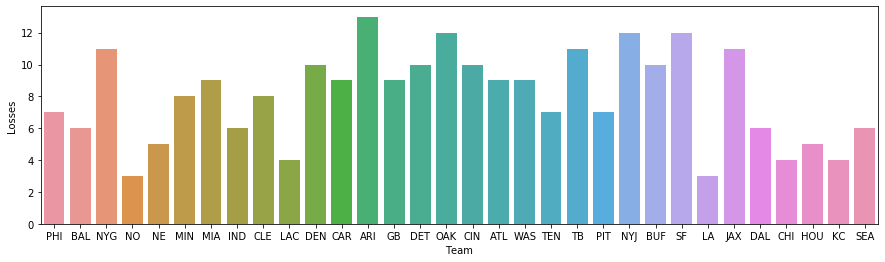

In [43]:
plt.figure(figsize=(15, 4))
ax = sns.barplot(x='Team', y='Losses', data=df_record)

In order to create an unstacked bar plot using Seaborn, we require *one* column of numerical values. In other words, we are going to have the two columns 'Wins' and "Losses" melted into one column. But we will have another column that identifies whether it is the number of wins or the number of losses.

This operation in called `melt()`

![melt illustration](../images/reshaping_melt.png)

In [54]:
df_record.melt(id_vars='Team', value_vars=['Wins', 'Losses'], var_name='WinLoss')

,Team,WinLoss,value
0,PHI,Wins,9
1,BAL,Wins,10
2,NYG,Wins,5
3,NO,Wins,13
4,NE,Wins,11
5,MIN,Wins,8
6,MIA,Wins,7
7,IND,Wins,10
8,CLE,Wins,8
9,LAC,Wins,12


In [57]:
#store the reshaped data frame in a new data frame called `df_melt`
df_melt = df_record.melt(id_vars='Team', value_vars=['Wins', 'Losses'], var_name='WinLoss')

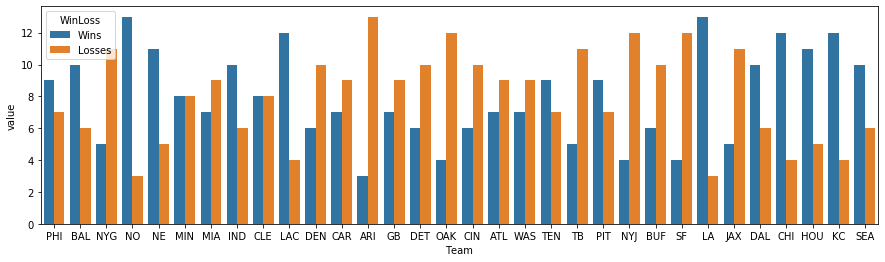

In [58]:
plt.figure(figsize=(15, 4))
ax = sns.barplot(x='Team', y='value', hue='WinLoss', data=df_melt)

To change it to custom colors, we will create a new color-palette.
For each unique value that the variable column takes, we assing one color.
In this case, the WinLoss column takes only two possible values: 'Wins' or 'Losses'
So let's specify two colors.

    win_loss_palette = {'Wins': 'Green', 'Losses': 'Red'}


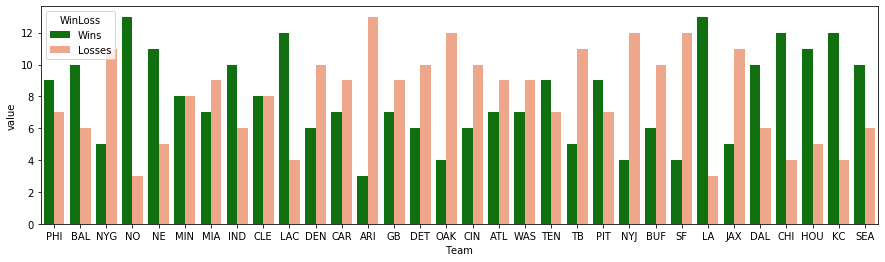

In [59]:
plt.figure(figsize=(15, 4))
win_loss_palette = {'Wins': 'Green', 'Losses': 'lightsalmon'}
ax = sns.barplot(x='Team', y='value', hue='WinLoss', 
                 palette= win_loss_palette, # we are specifying the color palette fro sns to use
                 data=df_melt)

In [64]:
df_melt.sort_values(['WinLoss', 'value'], ascending=False, inplace=True)

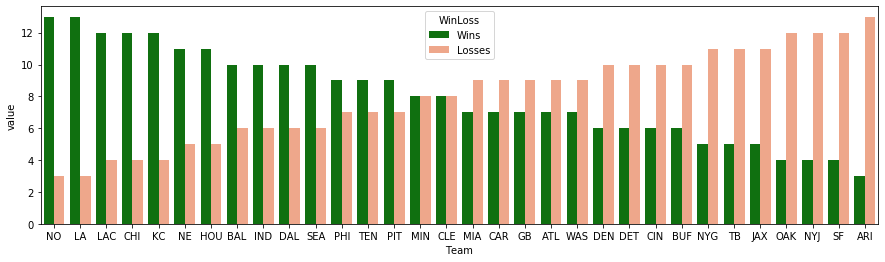

In [65]:
plt.figure(figsize=(15, 4))
win_loss_palette = {'Wins': 'Green', 'Losses': 'lightsalmon'}
ax = sns.barplot(x='Team', y='value', hue='WinLoss', palette= win_loss_palette, data=df_melt)

This is the result we wanted. We have managed to plot an unstacked bar plot for each team, use our preferred colors and sort by the total number of wins.

----